In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 1. Vollmondgeburten



In [5]:
df = pd.read_excel(
    "data/BFS_VitalStatistics.xlsx", skiprows=3, nrows=1381-3-1,
    usecols="B, D, AM:PQ"
)
df.head()

,Unnamed: 1,Unnamed: 3,Day - total.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,...,22.12,23.12,24.12,25.12,26.12,27.12,28.12,29.12,30.12,31.12
0,1969.0,Switzerland,8888,233,258,308,289,244,300,299,...,268,238,240,212,234,241,209,260,283,253
1,NaN,Zürich,1438,35,46,60,59,42,52,51,...,46,29,48,37,37,37,41,43,55,47
2,NaN,Bern / Berne,1266,25,37,44,40,29,43,48,...,55,41,34,29,36,35,33,44,41,33
3,NaN,Luzern,501,16,13,11,17,16,11,15,...,11,7,11,13,12,19,17,17,13,17
4,NaN,Uri,46,0,0,1,0,2,2,1,...,2,2,1,3,2,0,2,0,2,0


In [6]:
df.tail()

,Unnamed: 1,Unnamed: 3,Day - total.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,...,22.12,23.12,24.12,25.12,26.12,27.12,28.12,29.12,30.12,31.12
1372,NaN,Vaud,695,13,16,24,29,16,25,23,...,22,26,34,12,21,28,22,14,24,17
1373,NaN,Valais / Wallis,260,10,10,8,6,7,6,11,...,7,3,7,8,11,8,9,4,9,6
1374,NaN,Neuchâtel,156,4,5,4,8,5,4,1,...,2,2,5,3,4,4,0,0,5,2
1375,NaN,Genève,448,17,13,12,14,6,15,16,...,19,18,16,9,19,16,14,16,13,9
1376,NaN,Jura,64,1,0,3,1,0,1,0,...,0,1,3,1,1,1,1,0,0,1


Unbenannte Spalten benennen:

In [7]:
df = df.rename({"Unnamed: 1": "Jahr", "Unnamed: 3": "Kanton"}, axis=1)
df.head()

,Jahr,Kanton,Day - total.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,...,22.12,23.12,24.12,25.12,26.12,27.12,28.12,29.12,30.12,31.12
0,1969.0,Switzerland,8888,233,258,308,289,244,300,299,...,268,238,240,212,234,241,209,260,283,253
1,NaN,Zürich,1438,35,46,60,59,42,52,51,...,46,29,48,37,37,37,41,43,55,47
2,NaN,Bern / Berne,1266,25,37,44,40,29,43,48,...,55,41,34,29,36,35,33,44,41,33
3,NaN,Luzern,501,16,13,11,17,16,11,15,...,11,7,11,13,12,19,17,17,13,17
4,NaN,Uri,46,0,0,1,0,2,2,1,...,2,2,1,3,2,0,2,0,2,0


Tagestotale pro Monat entfernen:

In [8]:
df = df.drop( df.columns[df.columns.str.contains("Day")], axis=1 )
df.head()

,Jahr,Kanton,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,...,22.12,23.12,24.12,25.12,26.12,27.12,28.12,29.12,30.12,31.12
0,1969.0,Switzerland,233,258,308,289,244,300,299,277,...,268,238,240,212,234,241,209,260,283,253
1,NaN,Zürich,35,46,60,59,42,52,51,60,...,46,29,48,37,37,37,41,43,55,47
2,NaN,Bern / Berne,25,37,44,40,29,43,48,33,...,55,41,34,29,36,35,33,44,41,33
3,NaN,Luzern,16,13,11,17,16,11,15,19,...,11,7,11,13,12,19,17,17,13,17
4,NaN,Uri,0,0,1,0,2,2,1,2,...,2,2,1,3,2,0,2,0,2,0


Jahre vorwärts auffüllen:

In [9]:
df.Jahr = df.Jahr.ffill().astype(int)
df.head()

,Jahr,Kanton,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,...,22.12,23.12,24.12,25.12,26.12,27.12,28.12,29.12,30.12,31.12
0,1969,Switzerland,233,258,308,289,244,300,299,277,...,268,238,240,212,234,241,209,260,283,253
1,1969,Zürich,35,46,60,59,42,52,51,60,...,46,29,48,37,37,37,41,43,55,47
2,1969,Bern / Berne,25,37,44,40,29,43,48,33,...,55,41,34,29,36,35,33,44,41,33
3,1969,Luzern,16,13,11,17,16,11,15,19,...,11,7,11,13,12,19,17,17,13,17
4,1969,Uri,0,0,1,0,2,2,1,2,...,2,2,1,3,2,0,2,0,2,0


Dataframe in Long-Format bringen:

In [10]:
df = df.melt(id_vars=["Jahr", "Kanton"], var_name="Datum", value_name="Anzahl_Geburten")
df

,Jahr,Kanton,Datum,Anzahl_Geburten
0,1969,Switzerland,1.1,233
1,1969,Zürich,1.1,35
2,1969,Bern / Berne,1.1,25
3,1969,Luzern,1.1,16
4,1969,Uri,1.1,0
...,...,...,...,...
527386,2019,Vaud,31.12,17
527387,2019,Valais / Wallis,31.12,6
527388,2019,Neuchâtel,31.12,2
527389,2019,Genève,31.12,9


Monat und Tag setzen:

In [11]:
dates = df.Datum.str.split(".", expand=True)
dates.columns = ['Tag', 'Monat']
df = pd.concat( [df, dates], axis=1 )
df = df[['Kanton', 'Jahr', 'Monat', 'Tag', 'Anzahl_Geburten']].copy()
df.head()

,Kanton,Jahr,Monat,Tag,Anzahl_Geburten
0,Switzerland,1969,1,1,233
1,Zürich,1969,1,1,35
2,Bern / Berne,1969,1,1,25
3,Luzern,1969,1,1,16
4,Uri,1969,1,1,0


Auf merkwürdige Werte prüfen und ersetzen, sicherstellen dass alle Werte Integers sind:

In [12]:
df.Kanton.unique()

array(['Switzerland', 'Zürich', 'Bern / Berne', 'Luzern', 'Uri', 'Schwyz',
       'Obwalden', 'Nidwalden', 'Glarus', 'Zug', 'Fribourg / Freiburg',
       'Solothurn', 'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
       'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
       'Graubünden / Grigioni / Grischun', 'Aargau', 'Thurgau', 'Ticino',
       'Vaud', 'Valais / Wallis', 'Neuchâtel', 'Genève', 'Jura'],
      dtype=object)

In [13]:
df.Jahr.unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [14]:
df.Monat.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype=object)

In [15]:
df.Tag.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'No indication'],
      dtype=object)

In [16]:
df.Anzahl_Geburten.unique()

array([233, 35, 25, 16, 0, 5, 2, 1, 8, 7, 12, 21, 10, 6, 3, 227, 37, 30,
       4, 9, 23, 18, 15, 216, 11, 19, 20, 14, 188, 34, 22, 17, 206, 41,
       176, 13, 165, 24, 140, 141, 26, 139, 132, 28, 147, 36, 27, 156,
       163, 33, 175, 38, 172, 32, 161, 195, 179, 219, 29, 39, 199, 185,
       194, 31, 170, 168, 160, 201, 159, 164, 154, 138, 152, 46, 167, 187,
       40, 183, 258, 272, 42, 244, 237, 225, 221, 150, 162, 166, 209, 202,
       182, 180, 178, 203, 190, 210, 214, 211, 44, 191, 189, 186, 171,
       137, 155, 43, 212, 208, 308, 60, 45, 235, 47, 260, 49, 249, 250,
       48, 242, 238, 229, 198, 192, 217, 177, 240, 252, 256, 230, 173,
       234, 51, 57, 228, 245, 59, 259, 53, 289, 253, 52, 243, 267, 218,
       215, 204, 222, 232, 248, 223, 196, 220, 251, 62, 291, 269, 255,
       174, 193, 213, 231, 294, 226, 197, 184, 224, 246, 283, 56, 239,
       300, 262, 207, 158, 148, 169, 200, 236, 299, 263, 270, 205, 153,
       257, 50, 181, 54, 277, 247, 131, 254, 266, 264, 149, 32

In [17]:
df.Monat = df.Monat.astype('int')
df = df[df.Tag!='No indication'].copy()
df.Tag = df.Tag.astype('int')
df = df[~df.Anzahl_Geburten.isin(['*', '...'])].copy()
df.Anzahl_Geburten = df.Anzahl_Geburten.astype(int)
df.head()

,Kanton,Jahr,Monat,Tag,Anzahl_Geburten
0,Switzerland,1969,1,1,233
1,Zürich,1969,1,1,35
2,Bern / Berne,1969,1,1,25
3,Luzern,1969,1,1,16
4,Uri,1969,1,1,0


Ableiten eines Datumstring und in geeignetes Datumsformat bringen.
Filtern nach Daten nur aus der ganzen Schweiz (Kanton='Switzerland').

Datum aus Datumstring und to_datetime bauen und fehlende Werte entfernen:

In [18]:
df['Datum'] = pd.to_datetime( 
    df.Jahr.astype(str) + "." + df.Monat.astype(str) + "." + df.Tag.astype(str), errors="coerce" 
)
df.Datum.isna().any()

True

In [19]:
df = df[~df.Datum.isna()].copy()
df.head()

,Kanton,Jahr,Monat,Tag,Anzahl_Geburten,Datum
0,Switzerland,1969,1,1,233,1969-01-01
1,Zürich,1969,1,1,35,1969-01-01
2,Bern / Berne,1969,1,1,25,1969-01-01
3,Luzern,1969,1,1,16,1969-01-01
4,Uri,1969,1,1,0,1969-01-01


Nur Schweiz selektieren, Subset:

In [20]:
df_ch = df[df.Kanton=="Switzerland"]
df_ch = df_ch[['Datum', 'Anzahl_Geburten']]
df_ch = df_ch.reset_index(drop=True)
df_ch.head()

,Datum,Anzahl_Geburten
0,1969-01-01,233
1,1970-01-01,227
2,1971-01-01,216
3,1972-01-01,188
4,1973-01-01,206


Visualisieren Anzahl der Geburten pro Tag in der Schweiz (Kanton='Switzerland') im Jahr 2019.

<Axes: xlabel='Datum'>

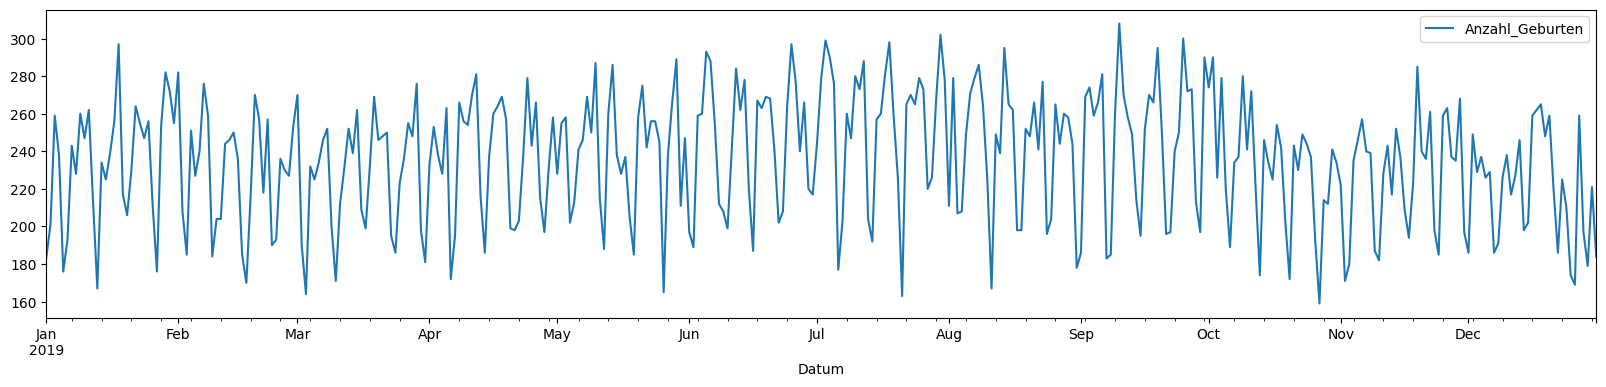

In [21]:
df_ch[df_ch.Datum.dt.year==2019].plot(x='Datum', y='Anzahl_Geburten', figsize=(20,4))

In der Datei `'mondphasen.csv'` finden Sie für jedes Datum seit 1970 die zugehörige Mondphase, benannt nach dem folgenden Schema:

<br>

<div>
<img src="data/mondphasen.png" width="500">
</div>

<br>

Berechnen der durchschnittliche Anzahl der Geburten in der Schweiz pro Mondphase seit 1970. Gibt es einen signifikanten Unterschied? (ohne auf statistische Tests zurückzugreifen)

Einlesen und Datumstyp setzen:

In [23]:
mondphasen = pd.read_csv("data/mondphasen.csv")
mondphasen.Datum = pd.to_datetime( mondphasen.Datum )
mondphasen.head()

,Datum,Mondphase
0,1970-01-01,Abnehmender Halbmond (letztes Viertel)
1,1970-01-02,Abnehmender Halbmond (letztes Viertel)
2,1970-01-03,Abnehmender Sichelmond
3,1970-01-04,Abnehmender Sichelmond
4,1970-01-05,Abnehmender Sichelmond


Merge:

In [24]:
df_ch = df_ch.merge( mondphasen, on="Datum")
df_ch.head()

,Datum,Anzahl_Geburten,Mondphase
0,1970-01-01,227,Abnehmender Halbmond (letztes Viertel)
1,1971-01-01,216,Zunehmender Sichelmond
2,1972-01-01,188,Vollmond
3,1973-01-01,206,Abnehmender Sichelmond
4,1974-01-01,176,Zunehmender Halbmond (erstes Viertel)


Groupby:

In [25]:
df_ch.groupby("Mondphase").Anzahl_Geburten.mean()

Mondphase
Abnehmender Dreiviertelmond               218.337133
Abnehmender Halbmond (letztes Viertel)    219.372644
Abnehmender Sichelmond                    219.369365
Neumond                                   218.976357
Vollmond                                  220.258545
Zunehmender Dreiviertelmond               219.215162
Zunehmender Halbmond (erstes Viertel)     219.508979
Zunehmender Sichelmond                    219.552102
Name: Anzahl_Geburten, dtype: float64

Unterschied:
    
*Es ist für einen Menschen wohl unmöglich, den Unterschied von 218 und 220 Geburten zu spüren.*

Visualisieren der durchschnittlichen Anzahl der Geburten pro Wochentag über die Jahre hinweg.

Wochentag isolieren, Barplot machen, Muster

C:\Users\sabin\AppData\Local\Temp\ipykernel_23212\896223647.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ch.groupby(weekday).Anzahl_Geburten.mean().plot.bar()


<Axes: >

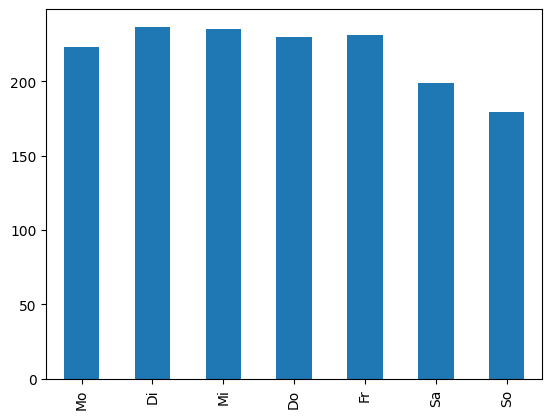

In [26]:
weekday = df_ch.Datum.dt.weekday.map({0: 'Mo', 1: 'Di', 2: 'Mi', 3: 'Do', 4: 'Fr', 5: 'Sa', 6: 'So'})
weekday = pd.Categorical( weekday, ['Mo','Di','Mi','Do','Fr','Sa','So'], ordered=True )
df_ch.groupby(weekday).Anzahl_Geburten.mean().plot.bar()

Muster: Weniger Geburten am Samstag und Sonntag wegen Termingeburten (geplante Kaiserschnitte).

# Aufgabe 2. Covid-Test-Triage

In [27]:
df = pd.read_csv("data/corona_tests.csv" )
df.head()

C:\Users\sabin\AppData\Local\Temp\ipykernel_23212\719996453.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/corona_tests.csv" )


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


Überblick über die Daten. Angabe der (einzigartigen) Ausprägungen aller Merkmale ausser Datum.

In [28]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


In [29]:
for col in df.columns[1:]:
    print("{}: {}".format(col, df[col].unique()))

cough: [ 0.  1. nan]
fever: [ 0.  1. nan]
sore_throat: [ 0.  1. nan]
shortness_of_breath: [ 0.  1. nan]
head_ache: [ 0.  1. nan]
corona_result: ['negative' 'positive' 'other']
age_60_and_above: [nan 'Yes' 'No']
gender: ['female' 'male' nan]
test_indication: ['Other' 'Abroad' 'Contact with confirmed']


Setzen eines sinnvollen Datentyp entsprechend den Ausprägungen.
Kennzeichnen fehlender Werte.

(Integer-Datentyp von Pandas kann nicht mit fehlenden Werten umgehen, hier stattdessen Float verwendet.)

Fehlende Werte ersetzen:

In [30]:
df = df.replace('None', np.nan)

Floats setzen:

In [31]:
df.cough = df.cough.astype(float)
df.fever = df.fever.astype(float)
df.sore_throat = df.sore_throat.astype(float)
df.shortness_of_breath = df.shortness_of_breath.astype(float)
df.head_ache = df.head_ache.astype(float)

Datum setzen:

In [32]:
df.test_date = pd.to_datetime( df.test_date )

Ausprägungen noch einmal ausgeben:

In [33]:
for col in df.columns[1:]:
    print("{}: {}".format(col, df[col].unique()))

cough: [ 0.  1. nan]
fever: [ 0.  1. nan]
sore_throat: [ 0.  1. nan]
shortness_of_breath: [ 0.  1. nan]
head_ache: [ 0.  1. nan]
corona_result: ['negative' 'positive' 'other']
age_60_and_above: [nan 'Yes' 'No']
gender: ['female' 'male' nan]
test_indication: ['Other' 'Abroad' 'Contact with confirmed']


Fehlende Werte pro Spalte absolut und prozentual.

In [34]:
np.sum( df.isna(), axis=0 )

test_date                   0
cough                     252
fever                     252
sore_throat                 1
shortness_of_breath         1
head_ache                   1
corona_result               0
age_60_and_above       127320
gender                  19563
test_indication             0
dtype: int64

In [35]:
np.mean( df.isna(), axis=0 ) * 100

test_date               0.000000
cough                   0.090372
fever                   0.090372
sore_throat             0.000359
shortness_of_breath     0.000359
head_ache               0.000359
corona_result           0.000000
age_60_and_above       45.659284
gender                  7.015650
test_indication         0.000000
dtype: float64

Encoden von corona_result:

In [36]:
df.corona_result = df.corona_result.map({'negative': 0, 'positive': 1, 'other': np.nan})
df.corona_result.value_counts(dropna=False)

corona_result
0.0    260227
1.0     14729
NaN      3892
Name: count, dtype: int64

In [37]:
df.age_60_and_above = df.age_60_and_above.map({'Yes': 1, 'No': 0})
df.age_60_and_above.value_counts(dropna=False)

age_60_and_above
NaN    127320
0.0    125703
1.0     25825
Name: count, dtype: int64

In [38]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,0.0,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,0.0,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,male,Other


Untersuchen der kategorische Variable test_indication. Welche der drei möglichen Test-Indikationen korrespondiert prozentual mit am meisten positiven Testergebnissen?

Prozentuale Werte bestimmen:

In [39]:
df.groupby('test_indication').corona_result.mean()

test_indication
Abroad                    0.074539
Contact with confirmed    0.698416
Other                     0.023149
Name: corona_result, dtype: float64

Oder umgekehrt:

In [40]:
df.groupby('corona_result').test_indication.value_counts().groupby(level=0).transform(lambda x: x/x.sum() * 100)

corona_result  test_indication       
0.0            Other                     89.868461
               Abroad                     8.917215
               Contact with confirmed     1.214324
1.0            Contact with confirmed    49.684296
               Other                     37.626451
               Abroad                    12.689252
Name: count, dtype: float64

In [41]:
df.groupby(['test_indication', 'corona_result']).size()

test_indication         corona_result
Abroad                  0.0               23205
                        1.0                1869
Contact with confirmed  0.0                3160
                        1.0                7318
Other                   0.0              233862
                        1.0                5542
dtype: int64

'Contact with confirmed' führt am öftesten zu positiven Testresultaten, was absolut Sinn macht.

Im folgenden möchten wir nur die Symptome 'cough', 'fever', 'sore_throat', 'shortness_of_breath' und 'head_ache' untersuchen.
Berechnen des durchschnittlichen Auftreten in Prozent dieser Symptome für getestete Personen mit und ohne Covid19. Priorisieren der einzelnen Symptome.

Gruppieren, Reihenfolge angeben:

In [42]:
df[
   ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result']
  ].groupby('corona_result').mean()

,cough,fever,sore_throat,shortness_of_breath,head_ache
corona_result,,,,,
0.0,0.134561,0.060829,0.001406,0.001479,0.000569
1.0,0.448013,0.378266,0.103612,0.079033,0.151752


Damit haben wir die bedingten Wahrscheinlichkeiten P(cough|positive), P(cough|negative), .. berechnet. Eigentlich möchten wir aber eher P(positive|cough), P(positive|fever), .. berechnen. Dazu brauchen wir nicht Bayes' Theorem, sondern nur eine andere Ansicht:

In [43]:
df[
   ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result']
  ].melt( id_vars='corona_result', var_name="symptom", value_name="value" )\
  .groupby( ["symptom", "value"] ) \
  .mean()\
  .sort_values("corona_result", ascending=False)

,,corona_result
symptom,value,
head_ache,1.0,0.937893
sore_throat,1.0,0.806554
shortness_of_breath,1.0,0.751453
fever,1.0,0.260070
cough,1.0,0.158380
shortness_of_breath,0.0,0.049611
sore_throat,0.0,0.048348
head_ache,0.0,0.045834
fever,0.0,0.036068


Triage: Zuerst diejenigen mit Kopfschmerzen, dann Halsschmerzen, dann Kurzatmigkeit.

Das Ziel  ist die Vorbereitung der Daten für das erstellen eines Machine-Learning-Modells. Ein signifikanter Teil der Daten in der Spalte 'age_60_and_above' fehlt jedoch. Statt die Spalte mit den fehlenden Werten vollständig zu entfernen, soll eine alternative Lösung implementiert werden, um mit den fehlenden Werten umzugehen.

Es gibt verschiedene Strategien, um fehlende Werte zu behandeln:

**Imputation mit dem Modus:**
* Vorteil: Diese Methode führt nur einen einfachen Bias ein.
* Nachteil: Der Zusammenhang mit anderen Variablen wird nicht berücksichtigt.

**Modell-basierte Imputation mit KNN:**
* Vorteil: Diese Methode berücksichtigt den Zusammenhang der fehlenden Werte mit anderen Variablen.
* Nachteil: Es könnten Korrelationen eingeführt werden, die zuvor nicht existierten.

**Verwendung eines Modells, das mit fehlenden Werten umgehen kann:**
* Vorteil: Das Fehlen eines Wertes wird automatisch in die Aussagekraft des Modells einbezogen.
* Nachteil: Die Auswahl an Modellen, die mit fehlenden Werten umgehen können, ist begrenzt.